<a href="https://colab.research.google.com/github/headnotf0und/refactored-octo-rotary-phone/blob/main/Chromebooki_rev_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymcdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 1.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
import pymcdm as pm
import matplotlib.pyplot as plt

In [3]:
# Widget do przesyłania plików
uploaded = files.upload()

# Przetwarzanie przesłanego pliku
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    # Przypisanie pierwszej kolumny do chromebook_names
    chromebook_names = df.iloc[:, 0].tolist()
    # Przypisanie pozostałych kolumn do tablicy chromebooks
    chromebooks = df.iloc[:, 1:].to_numpy()

# Tworzenie DataFrame z zaktualizowanych danych
df = pd.DataFrame(chromebooks, columns=[
    "Cena", "Przekątna ekranu", "Full HD", "IPS", "RAM", "Pojemność pamięci", "Qwerty PL", "Moc procesora", "EOL"
])

# Dodawanie kolumny z nazwami Chromebooków
df['Model'] = chromebook_names

# Wyświetlanie DataFrame
print(df)


Saving chromebook porównanie 24 - czerwiec chromebooks_dataset_ (6).csv to chromebook porównanie 24 - czerwiec chromebooks_dataset_ (6).csv
    Cena  Przekątna ekranu  Full HD  IPS  RAM  Pojemność pamięci  Qwerty PL  \
0    449                14        1    0    6                 64          0   
1    799                15        1    0    4                128          1   
2    299                11        0    1    4                 32          0   
3    275                11        0    1    4                 32          0   
4    399                11        0    1    4                 32          0   
5    699                11        0    0    4                 64          0   
6    309                15        1    0    8                 64          0   
7     99                11        0    0    4                 32          0   
8    141                11        0    0    4                 32          0   
9    169                11        0    0    4                 32      

In [4]:
# Normalizacja danych
scaler = MinMaxScaler()
chromebooks_normalized = scaler.fit_transform(chromebooks)

# Zdefiniuj wagi dla każdego kryterium
weights = np.array([0.2, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.05])

# Zdefiniuj zysk / strata dla każdego kryterium
types = np.array([-1, -1, 1, 1, 1, 1, 1, 1, 1])   # 1 jako zysk (max), -1 jako koszt (min)

In [5]:
# Obliczanie wyników
scores = np.dot(chromebooks_normalized, weights * types)

# Sortowanie wyników
sorted_indices = np.argsort(scores)[::-1]
sorted_chromebooks = chromebooks_normalized[sorted_indices]
sorted_scores = scores[sorted_indices]

# Wyświetlanie wyników
for i, index in enumerate(sorted_indices):
    print(f"{i+1}. {chromebook_names[index]}: Wynik = {sorted_scores[i]:.2f}")

1. HP Chromebook 14b-na0245nd : Wynik = 0.43
2. HP x360 14 G1 i3: Wynik = 0.31
3. HP Chromebook X360 14 G1: Wynik = 0.30
4. Lenovo Chromebook 500E II : Wynik = 0.29
5. Acer Chromebook 314: Wynik = 0.25
6. Acer Chromebook 315: Wynik = 0.20
7. Asus Chromebook C523N: Wynik = 0.19
8. Acer Spin 512: Wynik = 0.18
9. Hp Chromebook X360 G3 : Wynik = 0.18
10. Lenovo Chromebook 300E II: Wynik = 0.17
11. HP Chromebook 11 G8: Wynik = 0.16
12. Acer Chromebook Spin 11: Wynik = 0.10
13. Acer R11: Wynik = 0.10
14. Dell Chromebook 3100: Wynik = 0.09
15. Dell Chromebook 5190: Wynik = 0.04
16. HP Chromebook 11 G8 EE: Wynik = 0.03
17. Dell Chromebook 11 3189: Wynik = 0.00
18. Asus Chromebook C214M: Wynik = -0.04


In [6]:
# Inicjalizuj metody
methods = {
    'TOPSIS (minmax)': pm.methods.TOPSIS(),
    'TOPSIS (vector)': pm.methods.TOPSIS(pm.normalizations.vector_normalization),
    'VIKOR': pm.methods.VIKOR(),
    'COPRAS': pm.methods.COPRAS(),
    'MABAC': pm.methods.MABAC()
}

# Iteracja przez każdą metodę
preferences = {}
rankings = {}
for name, method_function in methods.items():
    preferences[name] = method_function(chromebooks, weights, types)
    rankings[name] = method_function.rank(preferences[name])

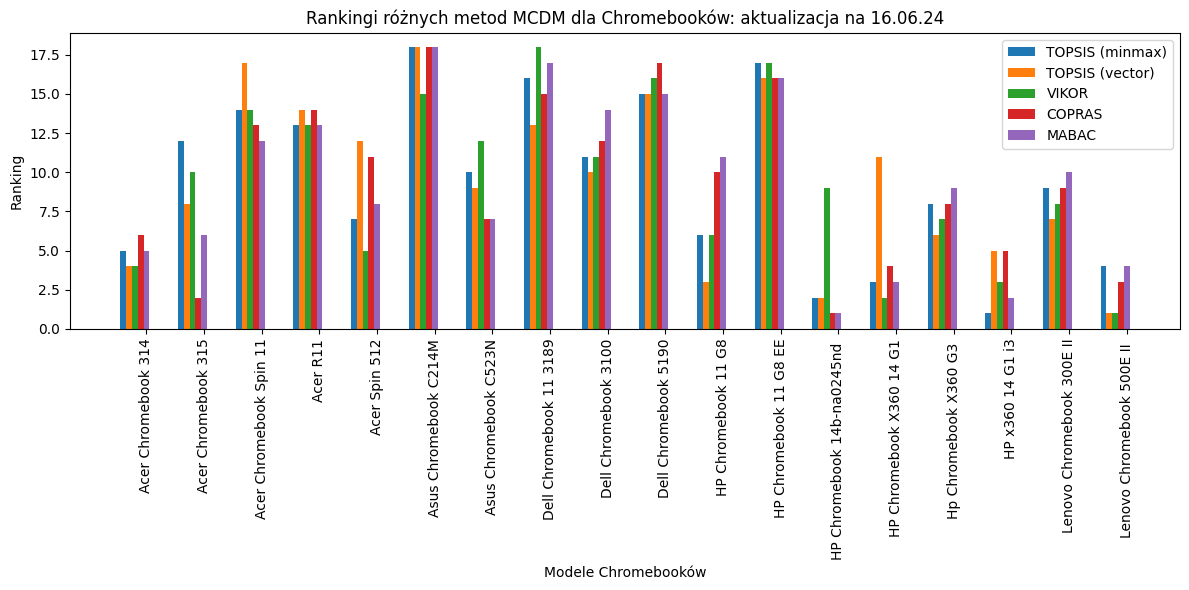

In [7]:
# Wykresy różnych metod

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.1
index = np.arange(len(chromebook_names))

for i, (method, ranking) in enumerate(rankings.items()):
    ax.bar(index + i * bar_width, ranking, bar_width, label=method)

ax.set_xlabel('Modele Chromebooków')
ax.set_ylabel('Ranking')
ax.set_title('Rankingi różnych metod MCDM dla Chromebooków: aktualizacja na 16.06.24')
ax.set_xticks(index + 0.4)
ax.set_xticklabels(chromebook_names, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

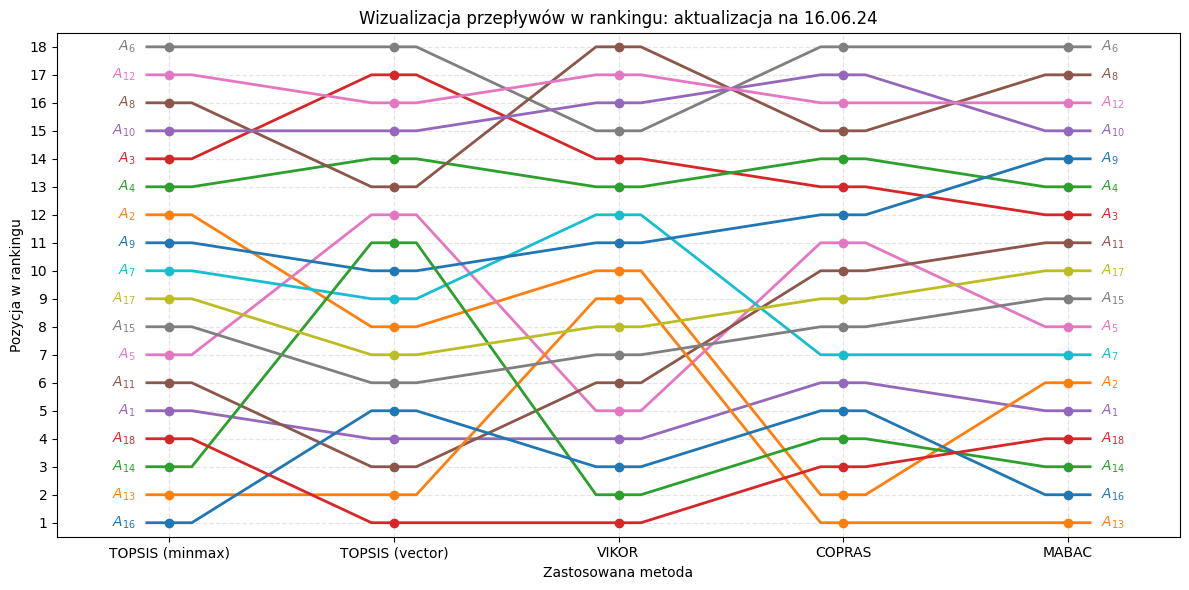

In [8]:
# Wyświetlenie rankingów przepływu
fig, ax = plt.subplots(figsize=(12, 6))

ranking_values = list(rankings.values())
pm.visuals.ranking_flows(ranking_values, labels=list(rankings.keys()), better_grid=True)

# Add axis labels (modify based on your ranking data)
plt.xlabel("Zastosowana metoda")
plt.ylabel("Pozycja w rankingu")
plt.title("Wizualizacja przepływów w rankingu: aktualizacja na 16.06.24")

plt.tight_layout()
plt.show()